### Environment initialize

In [1]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

In [8]:
theta=[.8,.6,.5]
def reward(arm):
    seed = random()
    if(seed<=theta[arm]):
        return 1
    return 0

============================================================================================================

# Content

- Algorithm code

  - [ε−greedy Algorithm](#%CE%B5%E2%88%92greedy-Algorithm)
  - [UCB (Upper Confidence Bound) Algorithm][algo1]
  - [Thompson sampling (TS) Algorithm][algo2]

- Simulation

  - [Step 0 -- Basic Test](#Step-0----Basic-Test)
  - [Step 1 -- oracle value](#Step-1----oracle-value)
  - [Step 2&3 -- Implement classical bandit algorithms and Run each for 200 times](#Step-2&3----Implement-classical-bandit-algorithms-and-Run-each-for-200-times)
  - [Step 4 -- Compute gap and Compare Algorithms](#Step-4----Compute-gap-and-Compare-Algorithms)
  - [Step 5 -- Give your understanding of the exploration-exploitation trade-off in bandit algorithms](#Step-5----Give-your-understanding-of-the-exploration-exploitation-trade-off-in-bandit-algorithms)
  - [Step 6 -- dependent arm](#Step-6----dependent-arm)
  - [Step 7 -- constrained bandit learning problem](#Step-7----constrained-bandit-learning-problem)

- [Reference](#Reference)

- [Step ∞ -- Addition](#Step-%E2%88%9E----Addition)

  - [A.Different Algorithms of CS view, pro,con, improvement](#A.Different-Algorithms-of-CS-view,-pro,con,-improvement)

    

  

  

  [algo1]:#UCB-(Upper-Confidence-Bound)-Algorithm
  [algo2]:#Thompson-sampling-(TS)-Algorithm





​	

============================================================================================================

# ε−greedy Algorithm

In [12]:
class Greedy:
    def __init__(self,v):
        self.counts = np.array([0, 0, 0])
        self.nearTheta = np.array([0, 0, 0], dtype=np.float16)
        self.choicesHistory = []
        self.moneyHistory=[]
        self.variation = v #突变因子（ε）

    def decide(self):
        seed = random()
        if (seed <= self.variation):
            choice = randint(0, 2)
        else:
            choice=self.nearTheta.argmax()
        rewardmoney=reward(choice)
        self.choicesHistory.append(choice)
        self.counts[choice]+=1
        self.nearTheta[choice]+=(rewardmoney-self.nearTheta[choice])/self.counts[choice]
        return rewardmoney
    def do(self,N,printresult=True):
        self.money = 0
        self.trytime = N
        for i in range(N):
            self.money += self.decide()
            self.moneyHistory.append(self.money)
        if printresult:
            print(f"Greedy\nMoney:{self.money} Try:{self.trytime} ratio:{self.money / self.trytime}")
        return self.money

# UCB (Upper Confidence Bound) Algorithm

In [13]:
class UCB:
    def __init__(self,c=1):
        self.counts = np.array([1, 1, 1])
        self.neartheta = np.array([reward(i) for i in range(3)], dtype=np.float16)
        self.constant = c
        self.choicesHistory = [0, 1, 2]
        self.moneyHistory=[0,0,0]
        self.t=3


    def decide(self):
        self.t+=1
        choice=np.array(self.neartheta+self.constant*np.sqrt(2.0*np.log(self.t)/self.counts)).argmax()
        self.choicesHistory.append(choice)
        self.counts[choice]+=1
        moneyget=reward(choice)
        self.neartheta[choice]+=(moneyget-self.neartheta[choice])*1.0/self.counts[choice]
        return moneyget
    def do(self,N,printresult=True):
        self.money = 0
        self.trytime = N
        self.money += sum(self.neartheta)

        for i in range(N - 3):
            self.money += self.decide()
            self.moneyHistory.append(self.money)
        if printresult:
            print(f"UCB\n Money:{self.money} Try:{self.trytime} ratio:{self.money / self.trytime}")
        return self.money

# Thompson sampling (TS) Algorithm

In [40]:
class Thompson:
    def __init__(self,alpha=1,beta=2):
        self.priorAlpha=alpha
        self.priorBeta=beta
        self.alpha=alpha*np.array([1,1,1])
        self.beta=beta*np.array([1,1,1])
        self.neartheta = np.array([])
        self.choicesHistory = []
        self.moneyHistory=[]

    def decide(self):
        neartheta = np.array(np.random.beta(self.alpha, self.beta))
        choice=neartheta.argmax()
        self.choicesHistory.append(choice)
        moneyget=reward(choice)
        self.alpha[choice]+=moneyget
        self.beta[choice]+=1-moneyget
        return moneyget
    def do(self,N,printresult=True):
        self.money=0
        self.trytime=N
        for i in range(N):
            self.money += self.decide()
            self.moneyHistory.append(self.money)
        if printresult:
            print(f"Tompson\n Money:{self.money} Try:{self.trytime} ratio:{self.money / self.trytime}")
        return self.money

============================================================================================================

# Simulation

## Step 0 -- Basic Test

Greedy
Money:4511 Try:6000 ratio:0.7518333333333334
UCB
 Money:4237.0 Try:6000 ratio:0.7061666666666667
Tompson
 Money:4751 Try:6000 ratio:0.7918333333333333


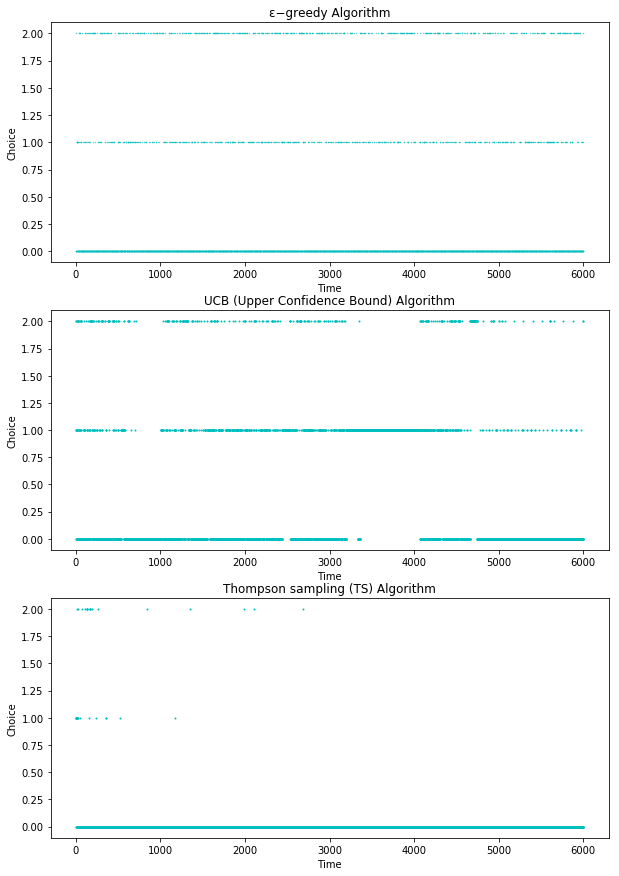

In [37]:
greedy=Greedy(0.3)
greedy.do(6000)
ucb=UCB()
ucb.do(6000)
tom=Thompson()
tom.do(6000)
fig,axes=plt.subplots(3,1,figsize=(10,15))
axes[0].scatter(np.arange(len(greedy.choicesHistory)), greedy.choicesHistory,c='c',marker="o",s=0.1)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Choice")
axes[0].set_title("ε−greedy Algorithm")
axes[1].scatter(np.arange(len(ucb.choicesHistory)), ucb.choicesHistory,c='c',marker="o",s=1)
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Choice")
axes[1].set_title("UCB (Upper Confidence Bound) Algorithm")
axes[2].scatter(np.arange(len(tom.choicesHistory)), tom.choicesHistory,c='c',marker="o",s=1)
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Choice")
axes[2].set_title("Thompson sampling (TS) Algorithm")
plt.show()

============================================================================================================

## Step 1 -- oracle value

- ε−greedy Algorithm
  - In the best case, in the first turn the algorithm try the first arm and in the following turns the first arm is constantly chosen. In such occasion the oracle value is N*θ1=4800
- UCB (Upper Confidence Bound) Algorithm
  - To get a precise oracle value is pretty difficult, so in order to get a as accurate as possible oracle value, only calculating the times must choosing arm except the first.
  - Due to sqrt(2ln(6000)/20)=0.9, assume that we have to choose the other two arm by 20*2=40 times despite the fact that the first arm is best.
  - In conclusion , the oracle value of UCB is near (6000-40)x0.8+20x0.6+20x0.5=4790
- Thompson sampling (TS) Algorithm
  - The best case is similar to the greedy algorithm, every turn the first Beta distribution  gives the largest result and thus first arm is chosen. So the oracle value is also 4800.


============================================================================================================

## Step 2&3 -- Implement classical bandit algorithms and Run each for 200 times

**First run each experiment once to obtain some information in one experiment and meanwhile conduct a test.**

Greedy
Money:4563 Try:6000 ratio:0.7605
Greedy
Money:4384 Try:6000 ratio:0.7306666666666667
Greedy
Money:4162 Try:6000 ratio:0.6936666666666667
Greedy
Money:3918 Try:6000 ratio:0.653
UCB
 Money:4194.0 Try:6000 ratio:0.699
UCB
 Money:3968.0 Try:6000 ratio:0.6613333333333333
UCB
 Money:3889.0 Try:6000 ratio:0.6481666666666667
Tompson
 Money:4780 Try:6000 ratio:0.7966666666666666
Tompson
 Money:4801 Try:6000 ratio:0.8001666666666667
Tompson
 Money:4817 Try:6000 ratio:0.8028333333333333
Tompson
 Money:4797 Try:6000 ratio:0.7995
Tompson
 Money:4818 Try:6000 ratio:0.803
Tompson
 Money:4861 Try:6000 ratio:0.8101666666666667


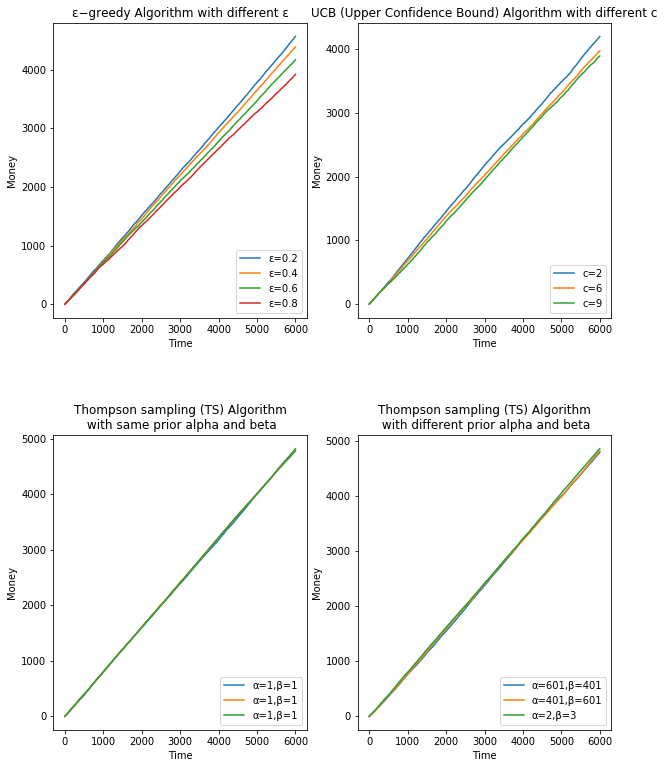

In [41]:
N=6000
greedys=[Greedy(0.2*i) for i in range(1,5)]
ucbs=[UCB(2),UCB(6),UCB(9)]
toms_1=[Thompson(1,1) for i in range(3)]
toms_2=[Thompson(601,401),Thompson(401,601),Thompson(2,3)]
fig,axes=plt.subplots(2,2,figsize=(10,13))
plt.subplots_adjust(hspace=0.4)

axes[0][0].set_title("ε−greedy Algorithm with different ε")
axes[0][0].set_xlabel("Time")
axes[0][0].set_ylabel("Money")
axes[0][1].set_title("UCB (Upper Confidence Bound) Algorithm with different c")
axes[0][1].set_xlabel("Time")
axes[0][1].set_ylabel("Money")
axes[1][0].set_title("Thompson sampling (TS) Algorithm\n with same prior alpha and beta")
axes[1][0].set_xlabel("Time")
axes[1][0].set_ylabel("Money")
axes[1][1].set_title("Thompson sampling (TS) Algorithm\n with different prior alpha and beta")
axes[1][1].set_xlabel("Time")
axes[1][1].set_ylabel("Money")
# serval Greedy
for g in greedys:
    g.do(N)
    axes[0][0].plot(g.moneyHistory,label=f"ε={round(g.variation,1)}")
    axes[0][0].legend(loc="lower right")
# serval UCB
for ucb in ucbs:
    ucb.do(N)
    axes[0][1].plot(ucb.moneyHistory,label=f"c={ucb.constant}")
    axes[0][1].legend(loc="lower right")
# serval same Thomposon
for tom in toms_1:
    tom.do(N)
    axes[1][0].plot(tom.moneyHistory, label=f"α={int(tom.priorAlpha)},β={int(tom.priorBeta)}")
    axes[1][0].legend(loc="lower right")

# serval different Thomposon
for tom in toms_2:
    tom.do(N)
    axes[1][1].plot(tom.moneyHistory, label=f"α={int(tom.priorAlpha)},β={int(tom.priorBeta)}")
    axes[1][1].legend(loc="lower right")
plt.show()


**After verifing the vaildness, let's conduct a massive amount experiment.**

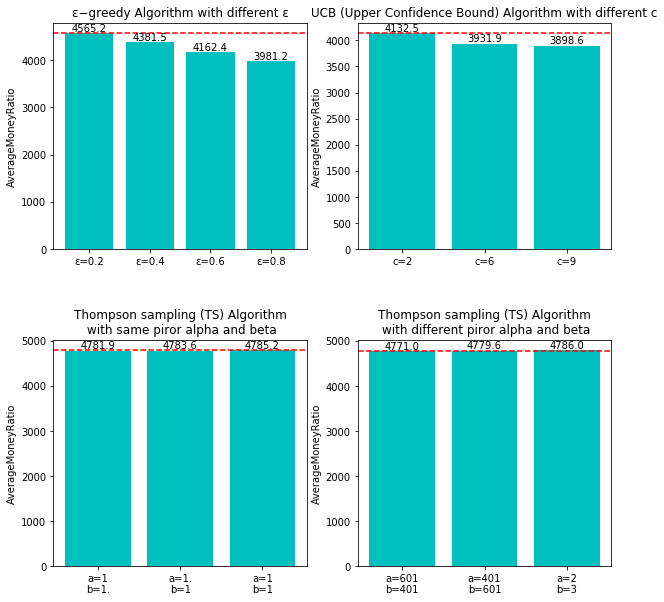

In [38]:
N=6000
EachN=200

greedysResult=np.zeros((1,4))
ucbsResult=np.zeros((1,3))
toms_1Result=np.zeros((1,3))
toms_2Result=np.zeros((1,3))
for ll in range(EachN):
    greedys = [Greedy(0.2 * i) for i in range(1, 5)]
    ucbs = [UCB(2), UCB(6), UCB(9)]
    toms_1 = [Thompson(1, 1) for i in range(3)]
    toms_2 = [Thompson(601, 401), Thompson(401, 601), Thompson(2, 3)]
    # serval Greedy
    greedysResult+=[g.do(N,printresult=False) for g in greedys]
    # serval UCB
    ucbsResult+=[ucb.do(N,printresult=False) for ucb in ucbs]
    # serval same Thomposon
    toms_1Result+=[tom.do(N,printresult=False) for tom in toms_1]
    # serval different Thomposon
    toms_2Result+=[tom.do(N,printresult=False) for tom in toms_2]

greedysResult/=EachN
ucbsResult/=EachN
toms_1Result/=EachN
toms_2Result/=EachN

plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
plt.subplot(221)
plt.title("ε−greedy Algorithm with different ε")
plt.ylabel("AverageMoneyRatio")
# plt.ylim([0.0,0.8])
label=("ε=0.2","ε=0.4","ε=0.6","ε=0.8")
x=plt.bar(label,greedysResult.tolist()[0],color="c")
for i in x :
    height=i.get_height()
    plt.text(round(i.get_x()+i.get_width()/2,1),height,str(round(height,1)),va="bottom",ha="center")
plt.axhline(y=greedysResult.max(),c="r",ls="--")

plt.subplot(222)
plt.title("UCB (Upper Confidence Bound) Algorithm with different c")
plt.ylabel("AverageMoneyRatio")
# plt.ylim([0.0,0.8])
label=("c=2","c=6","c=9")
x=plt.bar(label,ucbsResult.tolist()[0],color="c")
for i in x :
    height=i.get_height()
    plt.text(round(i.get_x() + i.get_width() / 2, 1), height, str(round(height,1)), va="bottom", ha="center")

plt.axhline(y=ucbsResult.max(),c="r",ls="--")

plt.subplot(223)
plt.title("Thompson sampling (TS) Algorithm\n with same prior alpha and beta")
plt.ylabel("AverageMoneyRatio")
# plt.ylim([0.0,0.8])
label=("a=1\nb=1.","a=1.\nb=1","a=1\nb=1")
x=plt.bar(label,toms_1Result.tolist()[0],color="c")
for i in x :
    height=i.get_height()
    plt.text(round(i.get_x() + i.get_width() / 2, 1), height, str(round(height,1)), va="bottom", ha="center")

plt.axhline(y=toms_1Result.max(),c="r",ls="--")

plt.subplot(224)
plt.title("Thompson sampling (TS) Algorithm\n with different prior alpha and beta")
plt.ylabel("AverageMoneyRatio")
# plt.ylim([0.0,0.8])
label=("a=601\nb=401","a=401\nb=601","a=2\nb=3")
x=plt.bar(label,toms_2Result.tolist()[0],color="c")
for i in x :
    height=i.get_height()
    plt.text(round(i.get_x() + i.get_width() / 2, 1), height, str(round(height,1)), va="bottom", ha="center")

plt.axhline(y=toms_1Result.max(),c="r",ls="--")
plt.show()

============================================================================================================

## Step 4 -- Compute gap and Compare Algorithms

In [29]:
print("Gap between ε-Greedy and its oracle value:",round(greedysResult.mean()-4800,3))
print("Gap between UCB and its oracle value:",round(ucbsResult.mean()-4790,3))
print("Gap between Thompson and its oracle value:",round(np.array(toms_1Result).mean()-4800,3))

Gap between ε-Greedy and its oracle value: -528.35
Gap between UCB and its oracle value: -810.733
Gap between Thompson and its oracle value: -10.467


    By calculating the Gap,we can conclude that in order to get the theoretical best result, we need a great luck in greedy and UCB algorithm. Actually that's not very surprising, because when calculating the oracle value, I assume every turn greedy very luckly find the best arm and the ucb only choose the other two arms as less as possible, resulting a larger gap of them.

When it comes to the money we obtain, it demonstrates that the **TS algorithm** outcomes the most, then followed by **greedy** with ε=0.2, and the last is the **UCB** with c=2.

From the very large image in step 2&3, 

- a relatively small ε is good for greedy, for not very many chances wasted in trying other arms in the Exploitation.
- Similarly, a relatively small c is good for UCB algorithm, because "compress" the confidence interval will save the precious chances in the Exploitation.
- The parameter of alpha and beta is a bit more complex:
  - scale: It's more reasonable to use a relatively small alpha and beta for the prior distribution parameter if we are not very clear about the real distribution. Because a large parameter is lazy to change during a small sample, so a relatively small parameter is more flexible.
  -  ratio: It turns out that a proper ratio of alpha/(alpha+beta) (proper means close to the mean of the mean of three θ) does help. According to the gap between "a=1&&b=1" and "a=2&&b=3" , a ratio close to E(θ) will fit to the real θ faster.

============================================================================================================

## Step 5 -- Give your understanding of the exploration-exploitation trade-off in bandit algorithms

    Intuitively speaking, the core problem in the bandit algorithm is to balance Exploration and Exploitation. At first time, we almost know noting about the θs, so we have to sacrifice the "best" choice in current situation and try other options that might seems bad at the moment. After that in the Exploitation we can enjoy the best choice. So when to stop exploring and take the final best choice is the key problem. To maximize the outcome, it's wise to stop at a proper time when we feel confident at the best choice we think. If we stop too early, we might miss a better choice in the future. On the contrary, if we stop too late, we will have wasted too many chances to earn credits.

    A strategy, combining the empirical knowledge from the project and the theory I learned from the course "**Probability and Mathematical Statistics**","Algorithms and Data Structures" and "Microeconomics", is to assess the profit (θ-hat times chances left plus current money) and the loss if  stop right now in every turn. The algorithm of assess loss depends on how  θ changes. In the project the θs are constant and will never change during the experiment, so the Beta distribution is a nice model. However in the real world θ is a variable and depends on many factors, then we have to find another model to fit such situation.

============================================================================================================

## Step 6 -- dependent arm

### Case1: We roughly know how arms depend on each other

 If we know the rough relationship of the three arms' distribution, then it might not do a great change. We can construct a refinement function H(x) to roughly fix the estimated θ.
$$
\bar\theta=\bar\theta+H(choice,reward,\bar\theta)
$$
And we can dynamically update H(x) itself to fit the real dependence relationship. Although it might not sounds to be a very ideal method, it costs very few and will do a little help.


### Case2: We do not know anything about the dependence but we have unlimited chances to try.

    Above all, let me make it clear that "unlimited chances" does not mean N is unlimited, but we can do unlimited N trials' experiments.
    If so we can use some very power algorithm to "train" a best stragegy regardless of how complex the dependence is. A commond way is to use Genetic Algorithm to train a clever person who gets a high score in this game. Another popular way is to trian a multiple layer of ANN to simulate the bandit itself and then hack it. For even more challenge dependent bandit we have GAN waitting for it.


### Case3: We do not know anything about the dependence and we have only one chance.

    It's a very tricky problem, considering it's hard than Static Games with Incomplete Information problem. It needs much more research to give a proper stragedy.

============================================================================================================

## Step 7 -- constrained bandit learning problem

Assume that pulling arm $I(t)$ will cost $C_{I(t)}$, in this case, 
$$
r_j=\left\{
\begin{aligned}
    &1-C_j, \textbf{w.p.}\ \theta_j\\
    &0-C_j, \textbf{w.p.}\ 1-\theta_j
\end{aligned}
\right.
$$
In "Multi-Armed Bandit with Budget Constraint and Variable Costs"(Wenkui Ding,2013), it's called as  multi-armed bandit problems with budget constraint and variable costs (MAB-BV).

While in such case the UCB algorithm still works fine but it requires some fix to it.

**Original UCB Algorithm**
$$
I(t)\leftarrow \mathop{argmax}\limits_{j\in\{1,2,3\}}(\hat \theta+c\sqrt\frac{2logt}{count(j)})
$$
**UCB-BV Algorithm**
$$
I(t)\leftarrow \mathop{argmax}\limits_{j\in\{1,2,3\}}(\frac{\hat r_j}{\hat c_j}+\frac{1}{\lambda}\left(1+\frac{1}{\lambda_t-\sqrt{\frac{log(t-1)}{count(j)}}}\right)\sqrt\frac{log(t-1)}{count(j)})
$$
Where $\hat r_j$ means the  average reward of arm j and $\hat c_j$ means  the average cost.
$$
\hat r_j=\frac{\sum_{k=1}^{t-1}r_jI(t)}{count(j)}\\
\hat c_j=\frac{\sum_{k=1}^{t-1}c_jI(t)}{count(j)}\\
$$
And  λ is the estimated low bound of cost.
$$
\lambda_t=min\ c_j
$$
The proof is very complicated to show right here, you can find it in the reference materials.

============================================================================================================

# Reference

1. [Pandey, S., Chakrabarti, D., & Agarwal, D. (2007, June). Multi-armed bandit problems with dependent arms. In *Proceedings of the 24th international conference on Machine learning* (pp. 721-728).](https://www.cs.cmu.edu/~spandey/publications/dependent-bandit.pdf)
2. [Ding, W., Qin, T., Zhang, X. D., & Liu, T. Y. (2013, June). Multi-armed bandit with budget constraint and variable costs. In *Twenty-Seventh AAAI Conference on Artificial Intelligence*.](https://www.aaai.org/ocs/index.php/AAAI/AAAI13/paper/view/6381/7122)
3. [Multi-armed bandit(Wikipedia)](https://en.wikipedia.org/wiki/Multi-armed_bandit#Constrained_contextual_bandit)
4. [Russo, D., Van Roy, B., Kazerouni, A., Osband, I., & Wen, Z. (2017). A tutorial on thompson sampling. *arXiv preprint arXiv:1707.02038*.](https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf)
5. [Lattimore, T., & Szepesvári, C. (2020). Bandits, Probability and Concentration. In *Bandit Algorithms* (pp. 1-2). Cambridge: Cambridge University Press. doi:10.1017/9781108571401.002](https://www.cambridge.org/core/books/bandit-algorithms/bandits-probability-and-concentration/B3813F43C2BD715B352328839794C50E)

============================================================================================================

## Step ∞ -- Addition

## A.Different Algorithms of CS view, pro,con, improvement

If we regard this problem as a decision tree, theses three algorithms use three methods to explore subbranches. Greedy use a random trigger to force explore, UCB uses the upper hoeffding bound as assess function and Thompson uses Beta distributions to simulate (or model ) the bandits. All of them will finally find the best arm, but due to the different property of every algorithm, their efficiency varies.

First is the ε-greedy algorithm,

​	One issue is its ε is constant during the experiment. However, in the exploration ε should be large to explore more branches but in exploitation the ε should be very small (even 0) because we are quite confident of our choice. The solution is simple lucky, all what we need is to use a time-dynamic ε, like the Simulated annealing algorithm.

​	The other issue is its action probability does not change as shew in the following image.The action probability sticks to the θ of the arm, which means the algorithm does not take advantage of the history experiment.

![2022-01-14T22_40_10](gandt.png)

- Second is the UCB algorithm
  - The most tricky issue is the Upper Confidence Bound itself. The algorithm is too optimistic and gives too much hope to other arms. The interval should not enlarge along with the time instead with the grow of our confidence we should lay less interest on other arms.
  - ​	    Another potention issue is that we can not simply use any priror information, the confidence interval is determined. 
- The last is the Thompson algorithm
  - This algorithm is quite fit to this problem. It's based on the distribution of Beta, which originally designed to solve problems like this. The only con might be we need a quite high-performance beta generator at first place and its "robust". We might feel at a lost when the bandit is added some extra conditions like cost.